# Sage's Analytics
This work belongs to Godwin Adegbehingbe

# Agenda
* About Dataset
* Loading Data
* Understanding Data
* Data Cleaning
* Exploratory Data Analysis Visualization





## About Data

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

Attribute Information:
1: surgery

1 = Yes, it had surgery
2 = It was treated without surgery


2: Age

1 = Adult horse
2 = Young (< 6 months)


3: Hospital Number

numeric id
the case number assigned to the horse (may not be unique if the horse is treated > 1 time)


4: rectal temperature

linear
in degrees celsius.
An elevated temp may occur due to infection.
temperature may be reduced when the animal is in late shock
normal temp is 37.8
this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock


5: pulse

linear
the heart rate in beats per minute
is a reflection of the heart condition: 30 -40 is normal for adults
rare to have a lower than normal rate although athletic horses may have a rate of 20-25
animals with painful lesions or suffering from circulatory shock may have an elevated heart rate


6: respiratory rate

linear
normal rate is 8 to 10
usefulness is doubtful due to the great fluctuations


7: temperature of extremities

a subjective indication of peripheral circulation
possible values: 1 = Normal 2 = Warm 3 = Cool 4 = Cold
cool to cold extremities indicate possible shock
hot extremities should correlate with an elevated rectal temp.


8: peripheral pulse

subjective
possible values are: 1 = normal 2 = increased 3 = reduced 4 = absent
normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion


9: mucous membranes

a subjective measurement of colour
possible values are: 1 = normal pink 2 = bright pink 3 = pale pink 4 = pale cyanotic 5 = bright red / injected 6 = dark cyanotic
1 and 2 probably indicate a normal or slightly increased circulation
3 may occur in early shock
4 and 6 are indicative of serious circulatory compromise
5 is more indicative of a septicemia


10: capillary refill time

a clinical judgement. The longer the refill, the poorer the circulation
possible values 1 = < 3 seconds 2 = >= 3 seconds
11: pain - a subjective judgement of the horse's pain level

possible values: 1 = alert, no pain 2 = depressed 3 = intermittent mild pain 4 = intermittent severe pain 5 = continuous severe pain
should NOT be treated as an ordered or discrete variable!
In general, the more painful, the more likely it is to require surgery
prior treatment of pain may mask the pain level to some extent


12: peristalsis

an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
possible values: 1 = hypermotile 2 = normal 3 = hypomotile 4 = absent


13: abdominal distension

An IMPORTANT parameter.
possible values 1 = none 2 = slight 3 = moderate 4 = severe
an animal with abdominal distension is likely to be painful and have reduced gut motility.
a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure


14: nasogastric tube

this refers to any gas coming out of the tube
possible values: 1 = none 2 = slight 3 = significant
a large gas cap in the stomach is likely to give the horse discomfort


15: nasogastric reflux

possible values 1 = none 2 = > 1 liter 3 = < 1 liter
the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine


16: nasogastric reflux PH

linear
scale is from 0 to 14 with 7 being neutral
normal values are in the 3 to 4 range


17: rectal examination - feces

possible values 1 = normal 2 = increased 3 = decreased 4 = absent
absent feces probably indicates an obstruction


18: abdomen

possible values 1 = normal 2 = other 3 = firm feces in the large intestine 4 = distended small intestine 5 = distended large intestine
3 is probably an obstruction caused by a mechanical impaction and is normally treated medically
4 and 5 indicate a surgical lesion


19: packed cell volume

linear
the # of red cells by volume in the blood
normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.


20: total protein

linear
normal values lie in the 6-7.5 (gms/dL) range
the higher the value the greater the dehydration


21: abdominocentesis appearance

a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity
possible values: 1 = clear 2 = cloudy 3 = serosanguinous
normal fluid is clear while cloudy or serosanguinous indicates a compromised gut


22: abdominocentesis total protein

linear
the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL


23: outcome

what eventually happened to the horse?
possible values: 1 = lived 2 = died 3 = was euthanized


24: surgical lesion?

retrospectively, was the problem (lesion) surgical?
all cases are either operated upon or autopsied so that this value and the lesion type are always known
possible values: 1 = Yes 2 = No


25, 26, 27: type of lesion

first number is site of lesion 1 = gastric 2 = sm intestine 3 = lg colon 4 = lg colon and cecum 5 = cecum 6 = transverse colon 7 = retum/descending colon 8 = uterus 9 = bladder 11 = all intestinal sites 00 = none
second number is type 1 = simple 2 = strangulation 3 = inflammation 4 = other
third number is subtype 1 = mechanical 2 = paralytic 0 = n/a
fourth number is specific code 1 = obturation 2 = intrinsic 3 = extrinsic 4 = adynamic 5 = volvulus/torsion 6 = intussusception 7 = thromboembolic 8 = hernia 9 = lipoma/splenic incarceration 10 = displacement 0 = n/a


28: cp_data

is pathology data present for this case? 1 = Yes 2 = No
this variable is of no significance since pathology data is not included or collected for these cases

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=150 # to display all columns 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Loading Data
df= pd.read_csv("horse-colic.csv")
test = pd.read_csv("horse-colic.test",sep=" ",na_values="?",engine="python",index_col=False)

df.shape,test.shape

((299, 28), (67, 28))

In [3]:
#Assigning Column todatasets
columns=['surgery','Age','Hospital Number',
         'rectal temperature','pulse','respiratory rate',
         'temperature of extremities','peripheral pulse',
         'mucous membranes','capillary refill time',
         'pain','peristalsis','abdominal distension',
         'nasogastric tube','nasogastric reflux',
         'nasogastric reflux PH','rectal examination'
         ,'abdomen','packed cell volume',
         'total protein','abdominocentesis appearance',
         'abdomcentesis total protein','outcome','surgical lesion',
         'type of lesion','type of lesion2','type of lesion3','cp_data']


test.columns =columns
df.columns =columns



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      299 non-null    object
 1   Age                          299 non-null    int64 
 2   Hospital Number              299 non-null    int64 
 3   rectal temperature           299 non-null    object
 4   pulse                        299 non-null    object
 5   respiratory rate             299 non-null    object
 6   temperature of extremities   299 non-null    object
 7   peripheral pulse             299 non-null    object
 8   mucous membranes             299 non-null    object
 9   capillary refill time        299 non-null    object
 10  pain                         299 non-null    object
 11  peristalsis                  299 non-null    object
 12  abdominal distension         299 non-null    object
 13  nasogastric tube             299 no

In [5]:
test.isnull().sum()

surgery                         1
Age                             0
Hospital Number                 0
rectal temperature              9
pulse                           2
respiratory rate               13
temperature of extremities      8
peripheral pulse               14
mucous membranes                1
capillary refill time           6
pain                            8
peristalsis                     8
abdominal distension            9
nasogastric tube               27
nasogastric reflux             27
nasogastric reflux PH          52
rectal examination             25
abdomen                        25
packed cell volume              8
total protein                  10
abdominocentesis appearance    28
abdomcentesis total protein    36
outcome                         1
surgical lesion                 0
type of lesion                  0
type of lesion2                 0
type of lesion3                 0
cp_data                         0
dtype: int64


# Data cleaning and Wrangling

In [6]:
col=["type of lesion2","type of lesion3","Hospital Number"]
df.drop(col,axis=1,inplace=True)
test.drop(col,axis=1,inplace=True)

In [7]:
#splitting the values of the column (type of lesion) into 4 columns
df[['site of lesion','type','subtype','specific code','none']]=df['type of lesion'].astype(str).apply(lambda x: pd.Series(list(x))).astype(float)
test[['site of lesion','type','subtype','specific code','none']]=test['type of lesion'].astype(str).apply(lambda x: pd.Series(list(x))).astype(float)


In [8]:
#dropping irrelevant column=type of lesion
df.drop('type of lesion', axis=1, inplace=True)
test.drop('type of lesion', axis=1, inplace=True)


In [9]:
#dropping all empty columns
df.drop('none',axis=1,inplace=True)
test.drop('none',axis=1,inplace=True)

In [10]:
df = df.dropna(subset=['outcome'])

In [11]:
df =df.replace({"?":np.nan})
df =df.replace({'nan' :np.nan})


test =test.replace({"?":np.nan})
test =test.replace({'nan' :np.nan})

In [12]:
#filling zeros with nan

df['type'] = df['type'].replace({0.0:np.nan})
df['subtype'] = df['subtype'].replace({0.0:np.nan})
df['specific code'] = df['specific code'].replace({0.0:np.nan})


test['type'] = test['type'].replace({0.0:np.nan})
test['subtype'] = test['subtype'].replace({0.0:np.nan})
test['specific code'] = test['specific code'].replace({0.0:np.nan})

In [13]:
#Since animals that were euthanized didn't survived , lets change the outcome of euthanized to dead

df["outcome"]=df["outcome"].replace({'3':"2"})

df["outcome"].value_counts()

1    178
2    120
Name: outcome, dtype: int64

In [14]:
test["outcome"]=test["outcome"].replace({3.0:2.0})
test["outcome"].value_counts()

1.0    46
2.0    20
Name: outcome, dtype: int64

In [15]:
#changing "3" to  np.nan
df["capillary refill time"]=df["capillary refill time"].replace({'3':np.nan})

In [16]:
df["capillary refill time"].value_counts()

1    188
2     77
Name: capillary refill time, dtype: int64

In [17]:
#replace the value 9 to 2 in the age column

df["Age"]=df["Age"].replace(to_replace=9,value=2)

test["Age"]=test["Age"].replace(to_replace=9,value=2)

In [18]:
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

surgery
2
['1' '2' nan]


Age
2
[1 2]


rectal temperature
65
['39.2' '38.30' '39.10' '37.30' nan '37.90' '38.10' '37.20' '38.00' '38.2'
 '37.60' '37.50' '39.4' '39.90' '38.40' '38.60' '38.3' '38.1' '37.80'
 '37.7' '37.70' '38.20' '37.8' '39.20' '39.00' '35.4' '38.90' '37.40'
 '40.30' '38.50' '37.9' '37.00' '39.7' '37.6' '38.7' '36.40' '37.3' '38.0'
 '38.80' '39.60' '36.80' '38.4' '39.50' '36.5' '39.40' '38.70' '37.4' '38'
 '36.00' '37.1' '38.9' '39.30' '38.8' '39.5' '37.5' '38.5' '37.10' '36.10'
 '39.3' '36.60' '40.80' '36.90' '38.6' '40.00' '36.50' '37.2']


pulse
52
['88' '40' '164' '104' nan '48' '60' '80' '90' '66' '72' '42' '92' '76'
 '96' '128' '64' '110' '130' '108' '100' '112' '52' '146' '150' '120'
 '140' '84' '46' '114' '160' '54' '56' '38' '98' '50' '44' '70' '78' '49'
 '30' '136' '132' '65' '86' '129' '68' '36' '45' '124' '184' '75' '82']


respiratory rate
40
['20' '24' '84' '35' nan '16' '36' '12' '52' '28' '48' '21' '60' '34' '42'
 '30' '96' '72' '15' '44' '32' '22' '18

In [19]:
for column in test.columns:
  print(column)
  print(test[column].nunique())
  print(test[column].unique())
  print('\n')

surgery
2
[ 2.  1. nan]


Age
2
[1 2]


rectal temperature
21
[37.6 37.7 37.  38.   nan 38.4 37.8 37.9 39.  38.2 38.3 37.5 39.7 38.1
 38.7 39.1 36.  37.1 38.6 37.4 36.6 38.5]


pulse
29
[ 48.  44.  56.  42.  60.  80.  65.  45.  84. 140. 120.  72.  92.  66.
  88. 150. 100.  40.  52.  76.  nan  55. 114.  82.  78.  34.  36.  54.
  90.  75.]


respiratory rate
15
[36. 28. 24. 12. 40. 60. nan 30. 20. 32. 44. 18. 10. 16. 96. 72.]


temperature of extremities
4
[nan  3.  2.  1.  4.]


peripheral pulse
4
[nan  4.  1.  2.  3.]


mucous membranes
6
[ 1.  3.  4.  2.  5.  6. nan]


capillary refill time
2
[ 1.  2. nan]


pain
5
[nan  5.  4.  1.  3.  2.]


peristalsis
4
[ 3.  4. nan  2.  1.]


abdominal distension
4
[nan  4.  3.  1.  2.]


nasogastric tube
3
[nan  1.  3.  2.]


nasogastric reflux
3
[nan  1.  2.  3.]


nasogastric reflux PH
11
[nan 7.  7.5 7.2 8.5 6.5 5.  8.  6.  2.  5.8 1.5]


rectal examination
4
[nan  3.  1.  2.  4.]


abdomen
5
[nan  5.  2.  1.  4.  3.]


packed cell volume
28
[

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      298 non-null    object 
 1   Age                          299 non-null    int64  
 2   rectal temperature           239 non-null    object 
 3   pulse                        275 non-null    object 
 4   respiratory rate             241 non-null    object 
 5   temperature of extremities   243 non-null    object 
 6   peripheral pulse             230 non-null    object 
 7   mucous membranes             253 non-null    object 
 8   capillary refill time        265 non-null    object 
 9   pain                         244 non-null    object 
 10  peristalsis                  255 non-null    object 
 11  abdominal distension         243 non-null    object 
 12  nasogastric tube             196 non-null    object 
 13  nasogastric reflux  

In [21]:
df.shape,test.shape

((299, 28), (67, 28))

In [22]:
df.head()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,cp_data,site of lesion,type,subtype,specific code
0,1,1,39.2,88,20,NaN,NaN,4,1,3,4,2,NaN,NaN,NaN,4,2,50,85,2,2,2,2,2,2.0,2.0,NaN,8.0
1,2,1,38.30,40,24,1,1,3,1,3,3,1,NaN,NaN,NaN,1,1,33.00,6.70,NaN,NaN,1,2,1,0.0,NaN,NaN,NaN
2,1,2,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,NaN,48.00,7.20,3,5.30,2,1,1,2.0,2.0,NaN,8.0
3,2,1,37.30,104,35,NaN,NaN,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.00,7.40,NaN,NaN,2,2,2,4.0,3.0,NaN,NaN
4,2,1,NaN,NaN,NaN,2,1,3,1,2,3,2,2,1,NaN,3,3,NaN,NaN,NaN,NaN,1,2,2,0.0,NaN,NaN,NaN


In [23]:
#Age: 1 = Adult horse,2 = Young (< 6 months)

df["Age"].value_counts()

1    275
2     24
Name: Age, dtype: int64

In [24]:
#all the unique values in the columns
df.nunique()

surgery                         2
Age                             2
rectal temperature             65
pulse                          52
respiratory rate               40
temperature of extremities      4
peripheral pulse                4
mucous membranes                6
capillary refill time           2
pain                            5
peristalsis                     4
abdominal distension            4
nasogastric tube                3
nasogastric reflux              3
nasogastric reflux PH          20
rectal examination              4
abdomen                         5
packed cell volume             80
total protein                  84
abdominocentesis appearance     3
abdomcentesis total protein    39
outcome                         2
surgical lesion                 2
cp_data                         2
site of lesion                 10
type                            4
subtype                         4
specific code                   9
dtype: int64

In [25]:
test.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time', 'pain', 'peristalsis', 'abdominal distension',
       'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH',
       'rectal examination', 'abdomen', 'packed cell volume', 'total protein',
       'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome',
       'surgical lesion', 'cp_data', 'site of lesion', 'type', 'subtype',
       'specific code'],
      dtype='object')

In [26]:
df['abdominocentesis appearance'].value_counts()

2    48
3    46
1    41
Name: abdominocentesis appearance, dtype: int64

In [27]:
df=df.astype(float)

df['Age']=df["Age"].astype(int)
df['surgical lesion']=df["surgical lesion"].astype(int)
df['cp_data']=df["cp_data"].astype(int)

In [28]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)

nasogastric reflux PH          82.27
abdomcentesis total protein    65.89
subtype                        65.22
abdominocentesis appearance    54.85
abdomen                        39.46
nasogastric reflux             35.12
nasogastric tube               34.45
rectal examination             34.11
specific code                  30.43
peripheral pulse               23.08
type                           22.07
rectal temperature             20.07
respiratory rate               19.40
abdominal distension           18.73
temperature of extremities     18.73
pain                           18.39
mucous membranes               15.38
peristalsis                    14.72
capillary refill time          11.37
total protein                  11.04
packed cell volume              9.70
pulse                           8.03
outcome                         0.33
surgery                         0.33
surgical lesion                 0.00
cp_data                         0.00
site of lesion                  0.00
A

In [29]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(test.isna().mean().round(4) * 100).sort_values(ascending = False)

nasogastric reflux PH          77.61
subtype                        58.21
abdomcentesis total protein    53.73
abdominocentesis appearance    41.79
nasogastric tube               40.30
nasogastric reflux             40.30
abdomen                        37.31
rectal examination             37.31
specific code                  25.37
peripheral pulse               20.90
type                           19.40
respiratory rate               19.40
total protein                  14.93
abdominal distension           13.43
rectal temperature             13.43
packed cell volume             11.94
peristalsis                    11.94
pain                           11.94
temperature of extremities     11.94
capillary refill time           8.96
pulse                           2.99
outcome                         1.49
mucous membranes                1.49
surgery                         1.49
Age                             0.00
surgical lesion                 0.00
cp_data                         0.00
s

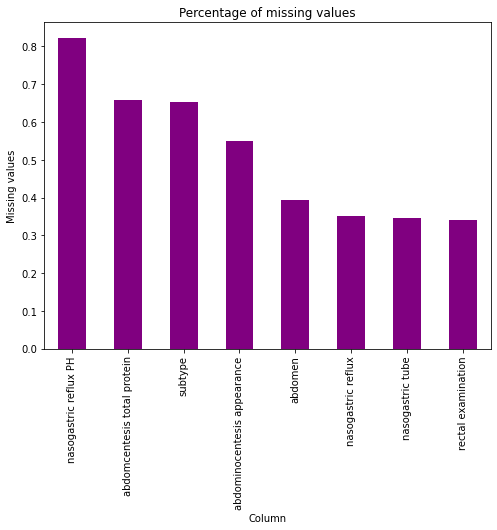

In [30]:
# Visualising missing values
#
df.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [31]:
df.describe()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,cp_data,site of lesion,type,subtype,specific code
count,298.000000,299.000000,239.000000,275.000000,241.000000,243.000000,230.000000,253.000000,265.000000,244.000000,255.000000,243.000000,196.000000,194.000000,53.000000,197.000000,181.000000,270.000000,266.000000,135.000000,102.000000,298.000000,299.000000,299.000000,299.000000,233.000000,104.000000,208.000000
mean,1.395973,1.080268,38.166527,71.934545,30.427386,2.345679,2.013043,2.853755,1.290566,2.942623,2.913725,2.259259,1.755102,1.582474,4.707547,2.756345,3.685083,46.300000,24.517293,2.037037,3.019608,1.402685,1.361204,1.668896,2.575251,1.772532,1.269231,4.235577
std,0.489881,0.272162,0.733508,28.680522,17.678256,1.046369,1.042672,1.620294,0.454883,1.303993,0.976298,1.061472,0.649437,0.805359,1.982311,1.254186,1.492667,10.438384,27.509056,0.804905,1.968567,0.491263,0.481155,0.471399,1.904654,0.853351,0.525667,2.696801
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.000000,3.000000,1.500000,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.000000,3.000000,4.000000,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,6.500000,4.000000,5.000000,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,5.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,2.000000,5.000000,4.000000,4.000000,3.000000,3.000000,7.500000,4.000000,5.000000,75.000000,89.000000,3.000000,10.100000,2.000000,2.000000,2.000000,9.000000,4.000000,4.000000,9.000000


In [32]:
test = test.fillna(test.median())
df = df.fillna(test.median())

In [33]:
df.isnull().sum()

surgery                        0
Age                            0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities     0
peripheral pulse               0
mucous membranes               0
capillary refill time          0
pain                           0
peristalsis                    0
abdominal distension           0
nasogastric tube               0
nasogastric reflux             0
nasogastric reflux PH          0
rectal examination             0
abdomen                        0
packed cell volume             0
total protein                  0
abdominocentesis appearance    0
abdomcentesis total protein    0
outcome                        0
surgical lesion                0
cp_data                        0
site of lesion                 0
type                           0
subtype                        0
specific code                  0
dtype: int64

In [34]:
test.isnull().sum()

surgery                        0
Age                            0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities     0
peripheral pulse               0
mucous membranes               0
capillary refill time          0
pain                           0
peristalsis                    0
abdominal distension           0
nasogastric tube               0
nasogastric reflux             0
nasogastric reflux PH          0
rectal examination             0
abdomen                        0
packed cell volume             0
total protein                  0
abdominocentesis appearance    0
abdomcentesis total protein    0
outcome                        0
surgical lesion                0
cp_data                        0
site of lesion                 0
type                           0
subtype                        0
specific code                  0
dtype: int64

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      67 non-null     float64
 1   Age                          67 non-null     int64  
 2   rectal temperature           67 non-null     float64
 3   pulse                        67 non-null     float64
 4   respiratory rate             67 non-null     float64
 5   temperature of extremities   67 non-null     float64
 6   peripheral pulse             67 non-null     float64
 7   mucous membranes             67 non-null     float64
 8   capillary refill time        67 non-null     float64
 9   pain                         67 non-null     float64
 10  peristalsis                  67 non-null     float64
 11  abdominal distension         67 non-null     float64
 12  nasogastric tube             67 non-null     float64
 13  nasogastric reflux    

In [36]:
df.shape,test.shape

((299, 28), (67, 28))

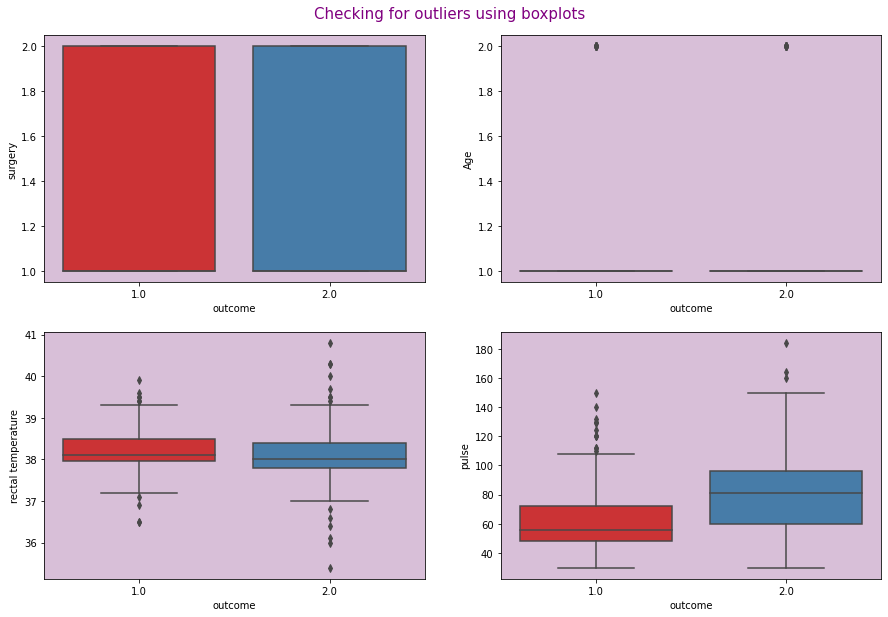

In [37]:
# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'purple')
for ax, data, column in zip(axes.flatten(), df, df.columns):
  sns.boxplot(df.outcome, df[column], ax = ax, palette = 'Set1')
  ax.set_facecolor('thistle') # Setting the background color to thistle

In [38]:
#sns.pairplot(df, kind='scatter', diag_kind='hist', palette='Rainbow')
#plt.show()

# Visualization

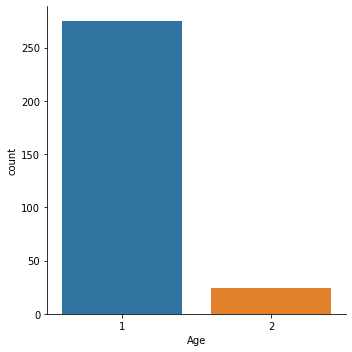

In [39]:
#print(df['Age'].value_counts())
sns.catplot(x='Age',data=df,kind='count')

<Figure size 1440x1440 with 0 Axes>

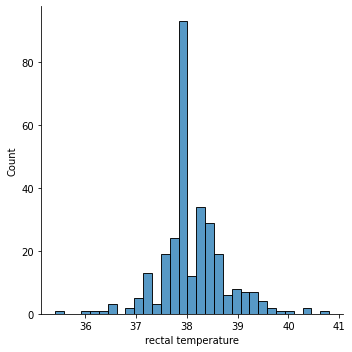

In [40]:
plt.figure(figsize=(20,20))
sns.displot(x=df["rectal temperature"])

<Figure size 1440x1440 with 0 Axes>

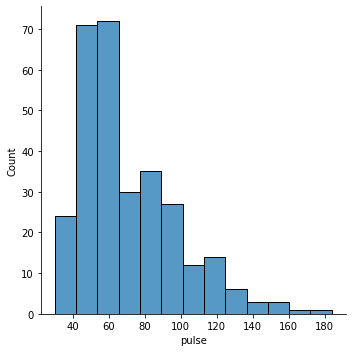

In [41]:
#df["pulse"]=df["pulse"].astype(int)
#print(df['pulse'].value_counts())


plt.figure(figsize=(20,20))
sns.displot(x=df["pulse"])
#pulse=df["pulse"].value_counts()
#plt.figure(figsize=(20,20))

#sns.barplot(x=pulse.index,y=pulse)


<Figure size 1440x1440 with 0 Axes>

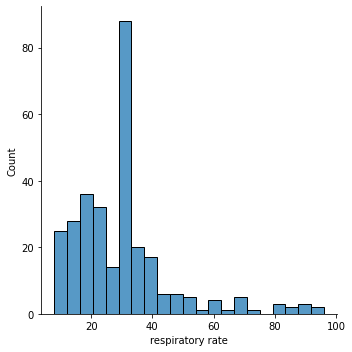

In [42]:
#df['respiratory rate']=df['respiratory rate'].astype(int)
#print(df['respiratory rate'].value_counts())


#resp =df["respiratory rate"].value_counts()
#plt.figure(figsize=(20,20))
plt.figure(figsize=(20,20))
sns.displot(x=df["respiratory rate"])
#sns.barplot(x=resp.index,y=resp)

<Figure size 1440x1440 with 0 Axes>

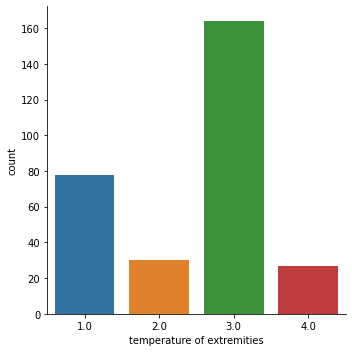

<Figure size 1440x1440 with 0 Axes>

In [43]:
#df['temperature of extremities']=df['temperature of extremities'].astype(int)
#print(df['temperature of extremities'].value_counts())

#Creating a factorplot
sns.catplot(x='temperature of extremities',data=df,kind='count')
plt.figure(figsize=(20,20))
#sns.displot(x=df["temperature of extremities"])

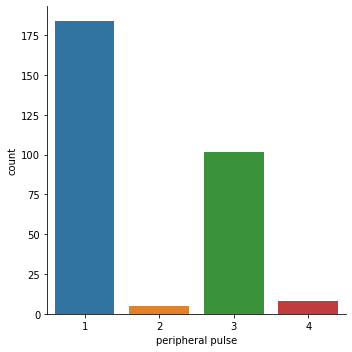

In [44]:
df['peripheral pulse']=df['peripheral pulse'].astype(int)
#print(df['peripheral pulse'].value_counts())


sns.catplot(x='peripheral pulse',data=df,kind='count')

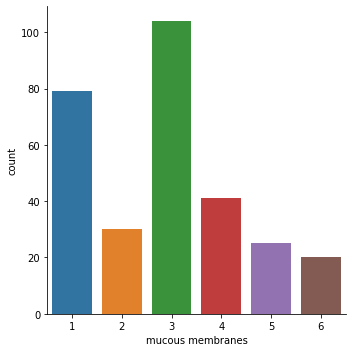

In [45]:
df['mucous membranes']=df['mucous membranes'].astype(int)
#print(df['mucous membranes'].value_counts())


sns.catplot(x='mucous membranes',data=df,kind='count')




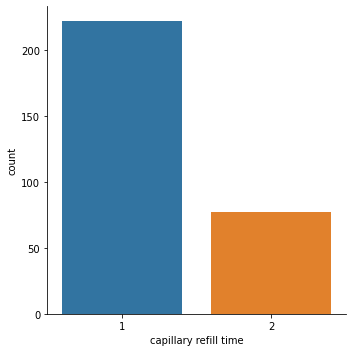

In [46]:

df['capillary refill time']=df['capillary refill time'].astype(int)
#print(df['capillary refill time'].value_counts())

sns.catplot(x='capillary refill time',data=df,kind='count')


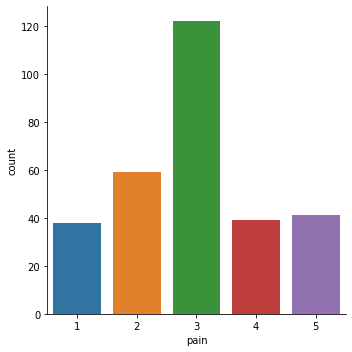

In [47]:



df['pain']=df['pain'].astype(int)
#print(df['pain'].value_counts())

sns.catplot(x='pain',data=df,kind='count')



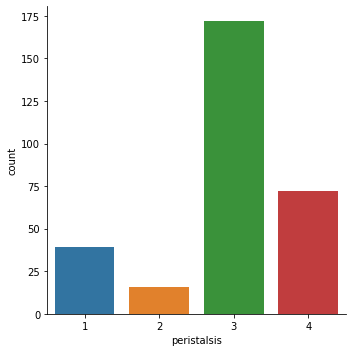

In [48]:



df['peristalsis']=df['peristalsis'].astype(int)
#print(df['peristalsis'].value_counts())

sns.catplot(x='peristalsis',data=df,kind='count')


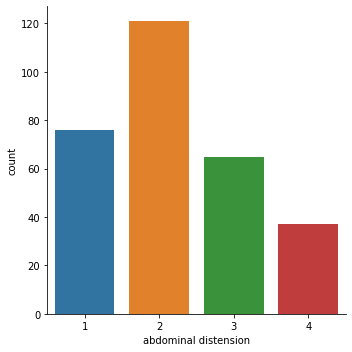

In [49]:

df['abdominal distension']=df['abdominal distension'].astype(int)
#print(df['abdominal distension'].value_counts())

sns.catplot(x='abdominal distension',data=df,kind='count')


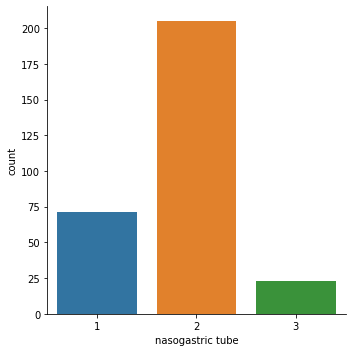

In [50]:


df['nasogastric tube']=df['nasogastric tube'].astype(int)
#print(df['nasogastric tube'].value_counts())

sns.catplot(x='nasogastric tube',data=df,kind='count')


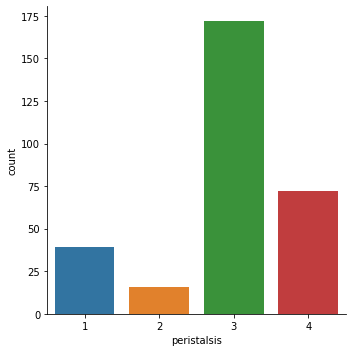

In [51]:



df['peristalsis']=df['peristalsis'].astype(int)
#print(df['peristalsis'].value_counts())

sns.catplot(x='peristalsis',data=df,kind='count')


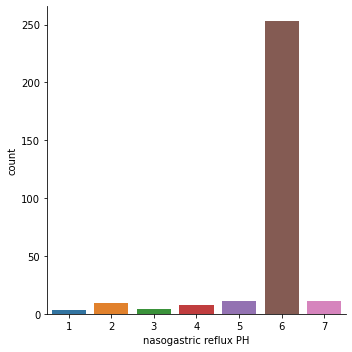

In [52]:



df['nasogastric reflux PH']=df['nasogastric reflux PH'].astype(int)
#print(df['nasogastric reflux PH'].value_counts())

sns.catplot(x='nasogastric reflux PH',data=df,kind='count')


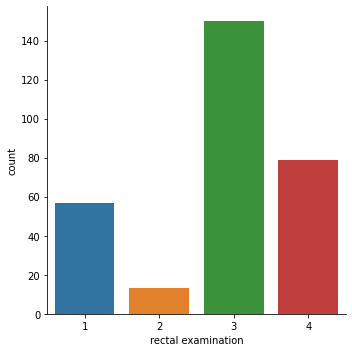

In [53]:


df['rectal examination']=df['rectal examination'].astype(int)
#print(df['rectal examination'].value_counts())

sns.catplot(x='rectal examination',data=df,kind='count')


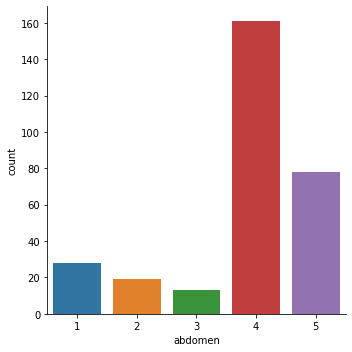

In [54]:



df['abdomen']=df['abdomen'].astype(int)
#print(df['abdomen'].value_counts())

sns.catplot(x='abdomen',data=df,kind='count')

<Figure size 1440x1440 with 0 Axes>

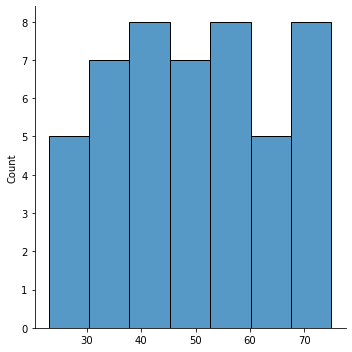

In [55]:
df['packed cell volume']=df['packed cell volume'].astype(int)
#print(df['packed cell volume'].value_counts())

pcv=df["packed cell volume"].value_counts()
plt.figure(figsize=(20,20))

sns.displot(x=pcv.index)#.index,y=pcv)


<Figure size 2160x720 with 0 Axes>

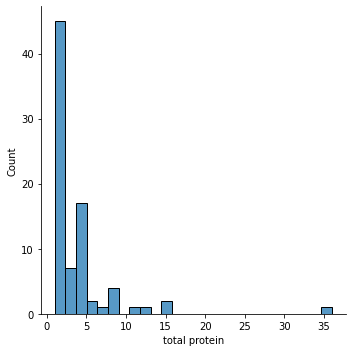

In [56]:
#print(df['total protein'].value_counts())


protein=df["total protein"].value_counts()
plt.figure(figsize=(30,10))

sns.displot(x=protein)#,y=protein)

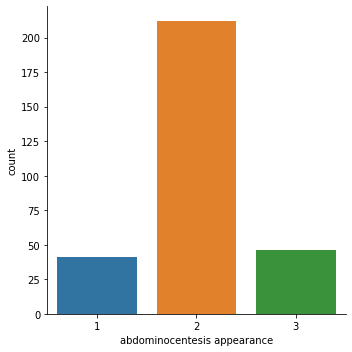

In [57]:

df['abdominocentesis appearance']=df['abdominocentesis appearance'].astype(int)
#print(df['abdominocentesis appearance'].value_counts())

sns.catplot(x='abdominocentesis appearance',data=df,kind='count')


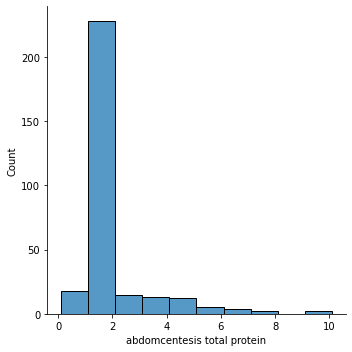

In [58]:
#print(df['abdomcentesis total protein'].value_counts())
sns.displot(x=df['abdomcentesis total protein'])

1    179
2    120
Name: outcome, dtype: int64


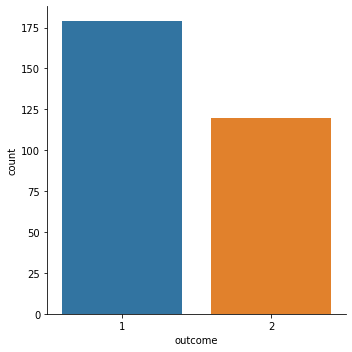

In [59]:


df['outcome']=df['outcome'].astype(int)

print(df['outcome'].value_counts())

sns.catplot(x='outcome',data=df,kind='count')


1    191
2    108
Name: surgical lesion, dtype: int64


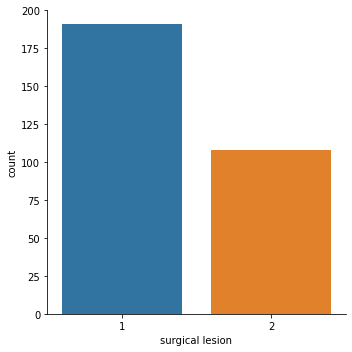

In [60]:


df['surgical lesion']=df['surgical lesion'].astype(int)
print(df['surgical lesion'].value_counts())

sns.catplot(x='surgical lesion',data=df,kind='count')


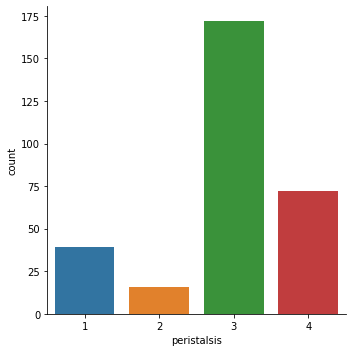

In [61]:


df['peristalsis']=df['peristalsis'].astype(int)
#print(df['peristalsis'].value_counts())

sns.catplot(x='peristalsis',data=df,kind='count')

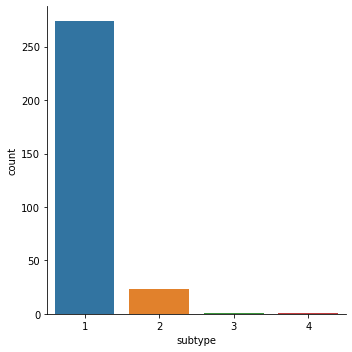

In [62]:


df['subtype']=df['subtype'].astype(int)
#print(df['subtype'].value_counts())

sns.catplot(x='subtype',data=df,kind='count')

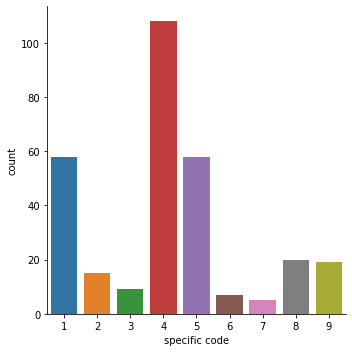

In [63]:


df['specific code']=df['specific code'].astype(int)
#print(df['specific code'].value_counts())

sns.catplot(x='specific code',data=df,kind='count')

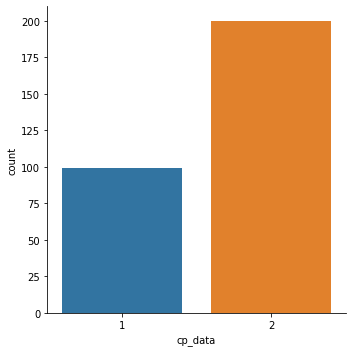

In [64]:


df['cp_data']=df['cp_data'].astype(int)
#print(df['cp_data'].value_counts())

sns.catplot(x='cp_data',data=df,kind='count')

# Exploratory Data Analysis

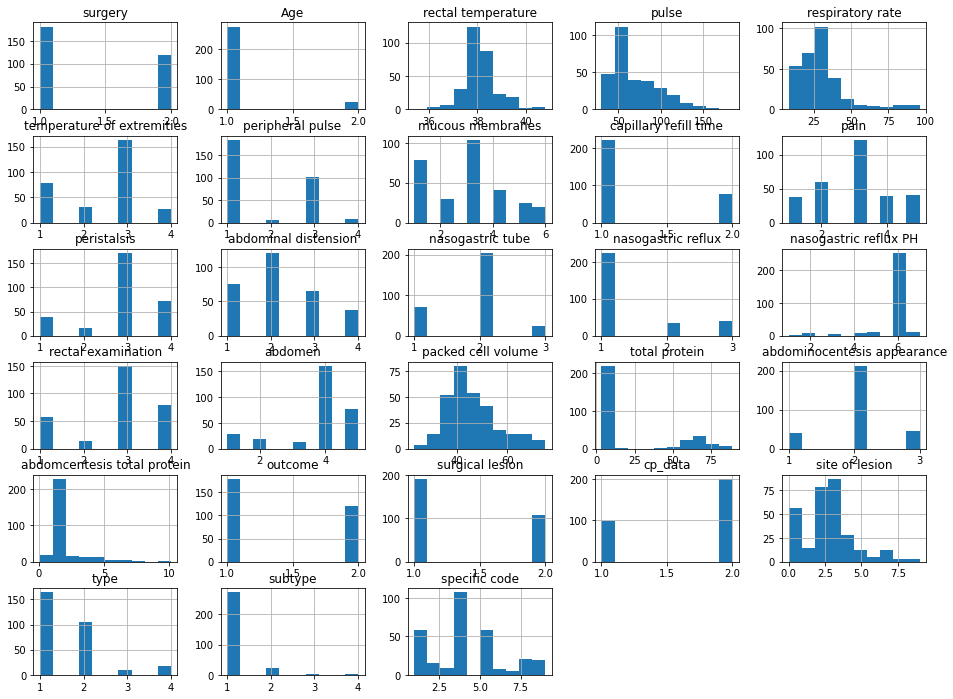

In [65]:

df.hist(bins=10, figsize=(16,12))
plt.show()

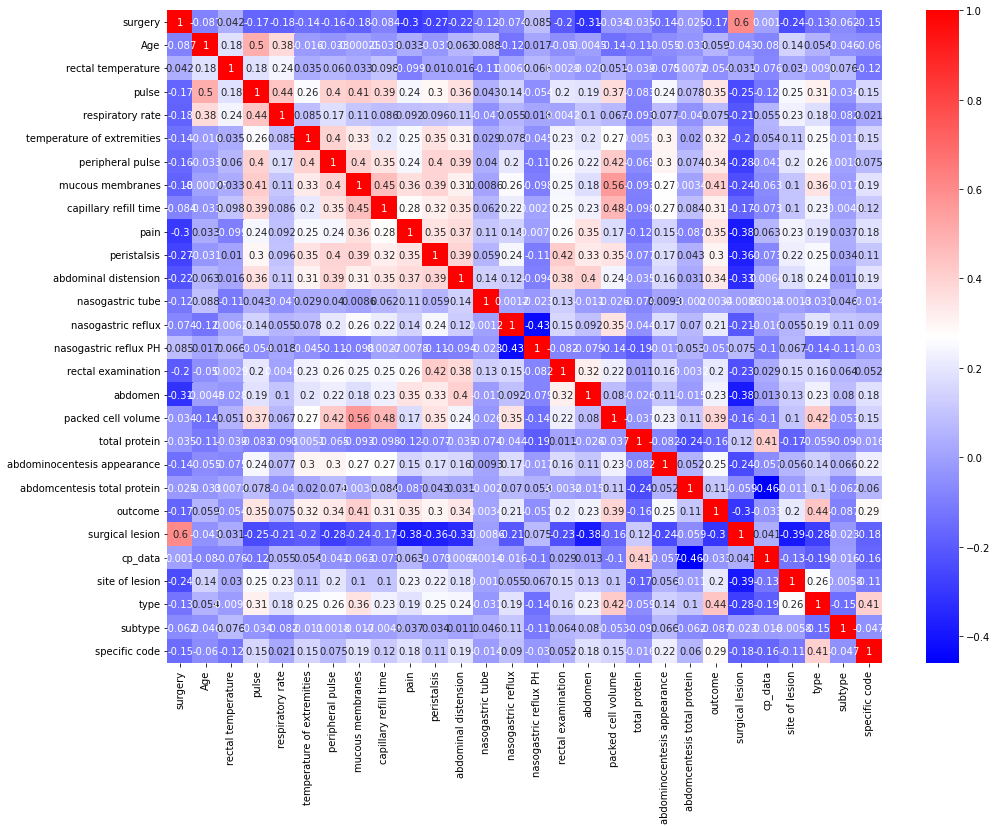

In [66]:

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

In [67]:
df.corr().head(10)

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,cp_data,site of lesion,type,subtype,specific code
surgery,1.000000,-0.087427,0.041535,-0.170838,-0.178210,-0.135053,-0.162700,-0.176521,-0.084313,-0.299568,-0.268410,-0.219914,-0.115356,-0.073797,0.084881,-0.201241,-0.313364,-0.034118,-0.034974,-0.139264,-0.025030,-0.172511,0.603673,0.001021,-0.237073,-0.125918,-0.062467,-0.150278
Age,-0.087427,1.000000,0.181609,0.503370,0.376215,-0.015617,-0.033020,-0.000249,-0.033234,0.032703,-0.030544,0.063362,0.088278,-0.123576,0.016817,-0.049950,-0.004475,-0.135723,-0.107258,-0.054823,-0.033178,0.059463,-0.042766,-0.079867,0.143673,0.053505,-0.045959,-0.059906
rectal temperature,0.041535,0.181609,1.000000,0.184149,0.238330,0.035261,0.059985,0.032878,0.098256,-0.099182,0.010325,0.015958,-0.108937,0.006198,0.065858,0.002932,-0.027906,0.051316,-0.039365,-0.075115,0.007190,-0.053659,0.030950,-0.075863,0.029693,-0.009084,0.075673,-0.122716
pulse,-0.170838,0.503370,0.184149,1.000000,0.440690,0.255537,0.399227,0.414925,0.385883,0.244639,0.295126,0.358086,0.042532,0.142171,-0.054452,0.198613,0.185932,0.369604,-0.083277,0.243475,0.077543,0.347696,-0.246929,-0.119614,0.252325,0.313897,-0.034160,0.153536
respiratory rate,-0.178210,0.376215,0.238330,0.440690,1.000000,0.085014,0.174904,0.105848,0.085620,0.092273,0.096171,0.114387,-0.046657,0.055134,0.017819,0.004176,0.100893,0.066976,-0.093394,0.076813,-0.040310,0.074885,-0.211867,0.055110,0.225307,0.176626,-0.082245,0.021477
temperature of extremities,-0.135053,-0.015617,0.035261,0.255537,0.085014,1.000000,0.397918,0.327877,0.203465,0.252427,0.351524,0.305305,0.028562,0.078343,-0.045445,0.226391,0.195727,0.268466,0.005109,0.303104,0.020441,0.320481,-0.196798,0.053587,0.107235,0.250605,-0.011396,0.146618
peripheral pulse,-0.162700,-0.033020,0.059985,0.399227,0.174904,0.397918,1.000000,0.396656,0.349229,0.242580,0.395082,0.386888,0.039580,0.197728,-0.109707,0.264446,0.219994,0.421903,-0.064630,0.302366,0.073925,0.335190,-0.277572,-0.041289,0.195494,0.263008,0.001795,0.075098
mucous membranes,-0.176521,-0.000249,0.032878,0.414925,0.105848,0.327877,0.396656,1.000000,0.454914,0.361704,0.392509,0.310727,0.008617,0.255194,-0.097913,0.246378,0.178758,0.559715,-0.092641,0.269303,0.003382,0.407292,-0.236862,-0.063267,0.101962,0.355486,-0.017049,0.188104
capillary refill time,-0.084313,-0.033234,0.098256,0.385883,0.085620,0.203465,0.349229,0.454914,1.000000,0.277154,0.319969,0.348667,0.062091,0.216121,0.002684,0.249674,0.227027,0.481198,-0.098018,0.265456,0.084471,0.313591,-0.172169,-0.073217,0.103400,0.230690,-0.004823,0.117056
pain,-0.299568,0.032703,-0.099182,0.244639,0.092273,0.252427,0.242580,0.361704,0.277154,1.000000,0.353749,0.370119,0.109881,0.142543,-0.007821,0.260942,0.351401,0.172420,-0.120266,0.148959,-0.086638,0.345975,-0.384578,0.062647,0.231954,0.189472,0.036703,0.182706


Intermediate postive correlation was found mostly between the features

~surgery[whether the animal was treated with surgery or not] is highly correlated to surgical lesion[if the lesion was surgical]

~peripheral pulse[indicative of adequate circulation] is slightly correlated with mucous membrane[measurement of colour] and peristalsis[indication of the activity in the horse's gut]

~mucous membrane[measurement of colour] is slightly correlated with capillary refill time[The longer the refill, the poorer the circulation]

~pain[horse's pain level] is slightly correlated with peristalsis[indication of the activity in the horse's gut] and abdominal distension[- an animal with abdominal distension is likely to be painful and
have reduced gut motility. - a horse with severe abdominal distension is likely to require
            surgery just tio relieve the pressure]

~peristalsis is slightly correlated with abdominal distension[- an animal with abdominal distension is likely to be painful and
have reduced gut motility. - a horse with severe abdominal distension is likely to require
surgery just tio relieve the pressure]

~nasogastric reflux[the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine] is slightly correlated with nasogastric reflux pH[ - scale is from 0 to 14 with 7 being neutral, - normal values are in the 3 to 4 range]

~Rectal examination[feces] is slightly correlated with [presence of materials]

~pcv[the # of red cells by volume in the blood,] is slightly correlated with mucous membrane

~total protein[ - the higher the value the greater the dehydration] is slightly correlated with  cp_data[is pathology data present for this case?]

~abdominocentesis appearance [ colour of fluid is obtained from the abdominal cavity] is slightly correlated with abdominocentesis total protein[he higher the level of protein the more likely it is to have compromised gut]

~outcome[what eventually happened to the horse?] is slightly correlated with type

~site of lesion is slightly correlated with  type of lesion

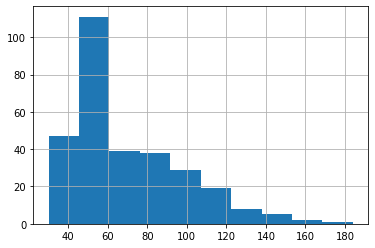

In [68]:
df['pulse'].hist()

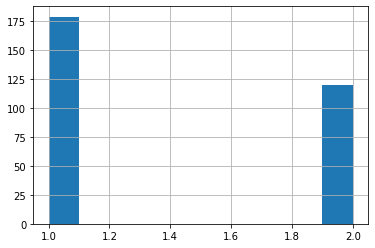

In [69]:
df["outcome"].hist()

# Bivariate Analysis

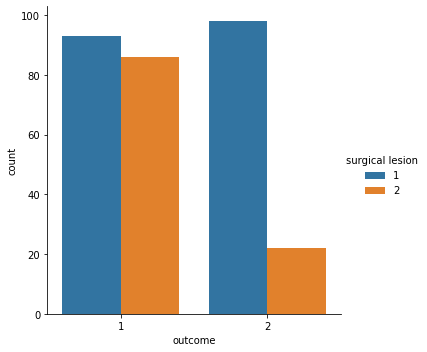

In [70]:
sns.catplot(x='outcome',data=df,hue='surgical lesion',kind='count')

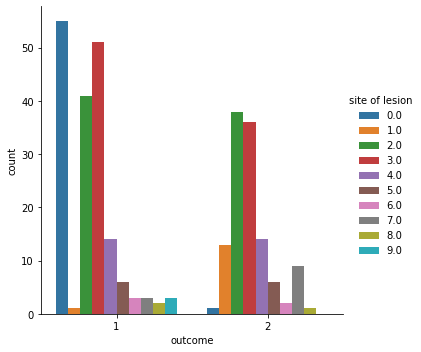

In [71]:
sns.catplot(x='outcome',data=df,hue='site of lesion',kind='count')

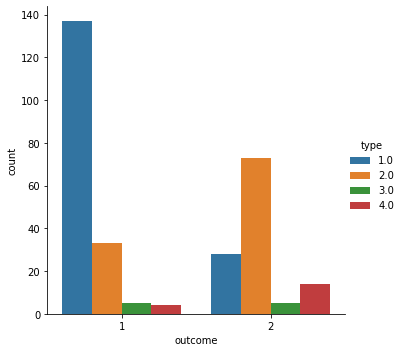

In [72]:
sns.catplot(x='outcome',data=df,hue='type',kind='count')

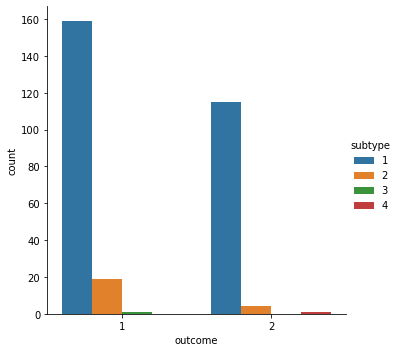

In [73]:
sns.catplot(x='outcome',data=df,hue='subtype',kind='count')

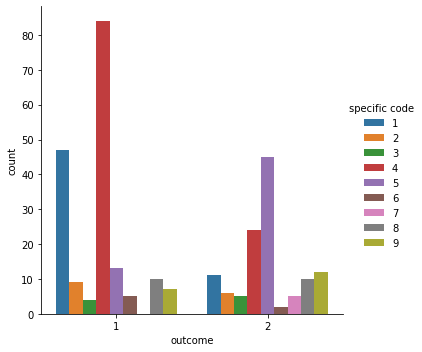

In [74]:
sns.catplot(x='outcome',data=df,hue='specific code',kind='count')

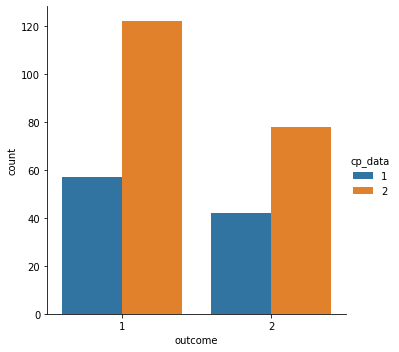

In [75]:
sns.catplot(x='outcome',data=df,hue='cp_data',kind='count')

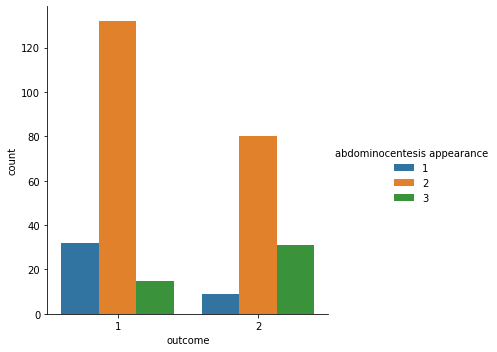

In [76]:
sns.catplot(x='outcome',data=df,hue='abdominocentesis appearance',kind='count')

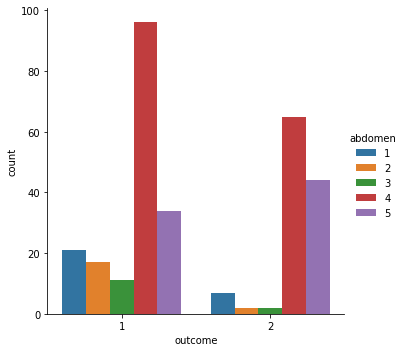

In [77]:
sns.catplot(x='outcome',data=df,hue='abdomen',kind='count')

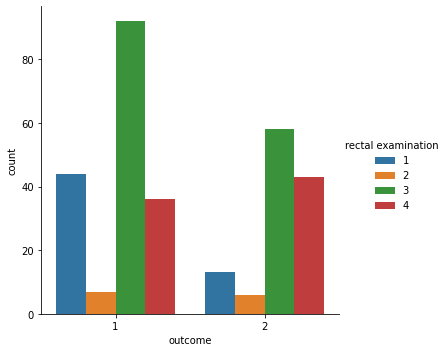

In [78]:
sns.catplot(x='outcome',data=df,hue='rectal examination',kind='count')

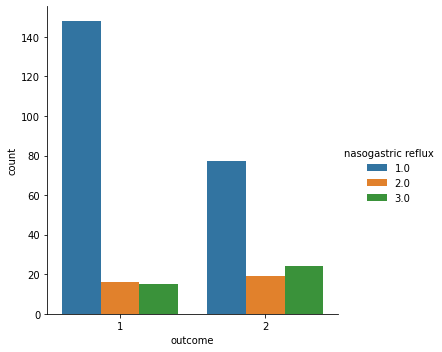

In [79]:
sns.catplot(x='outcome',data=df,hue='nasogastric reflux',kind='count')

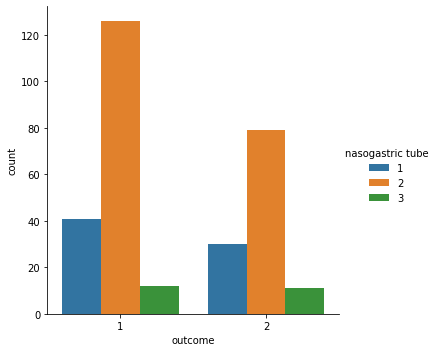

In [80]:
sns.catplot(x='outcome',data=df,hue='nasogastric tube',kind='count')

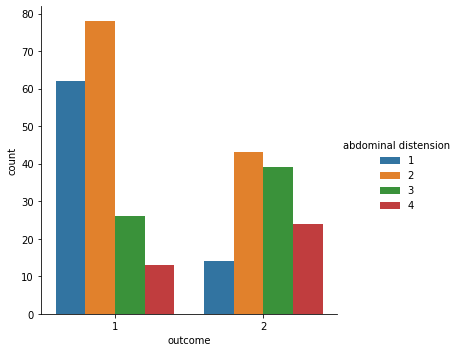

In [81]:
sns.catplot(x='outcome',data=df,hue='abdominal distension',kind='count')

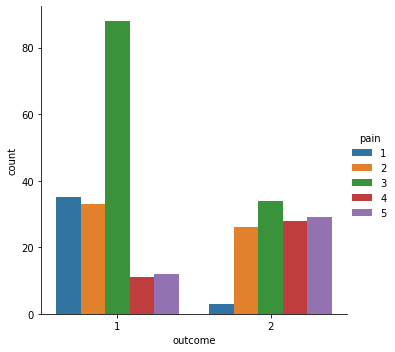

In [82]:
sns.catplot(x='outcome',data=df,hue='pain',kind='count')

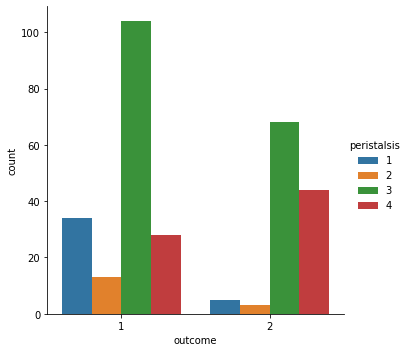

In [83]:
sns.catplot(x='outcome',data=df,hue='peristalsis',kind='count')

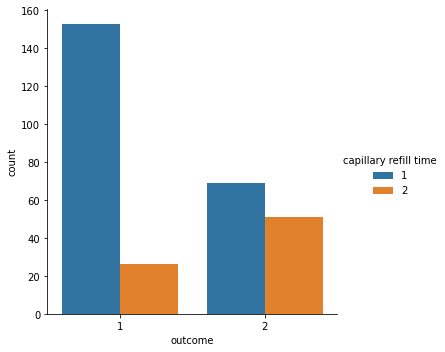

In [84]:
sns.catplot(x='outcome',data=df,hue='capillary refill time',kind='count')

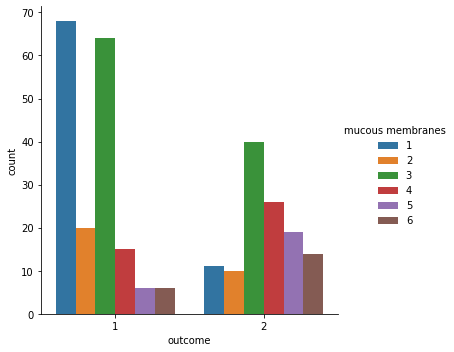

In [85]:
sns.catplot(x='outcome',data=df,hue='mucous membranes',kind='count')

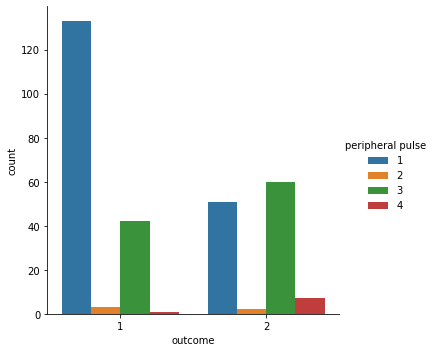

In [86]:
sns.catplot(x='outcome',data=df,hue='peripheral pulse',kind='count')

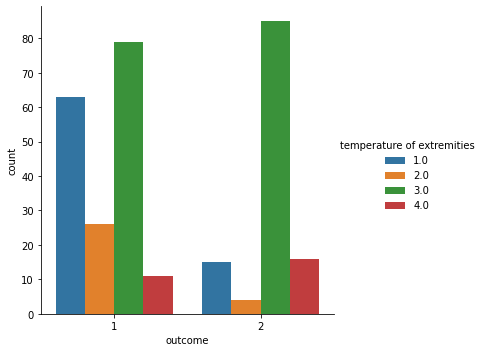

In [87]:
sns.catplot(x='outcome',data=df,hue='temperature of extremities',kind='count')

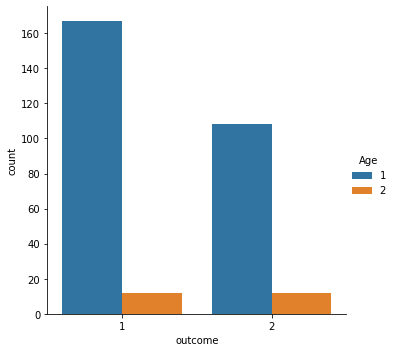

In [88]:
sns.catplot(x='outcome',data=df,hue='Age',kind='count')

# Findings

In [89]:
df.shape,test.shape

((299, 28), (67, 28))

In [90]:
df.to_csv("clean_train1s.csv")
test.to_csv("clean_test2s.csv")